# Computational modeling : RL algorithms in a virtual environment

Question : under very low amounts of evidence, how do human sample a complex action space ? Can we infer some form of structure in this exploration ? Can Active Inference provide some answers regarding the mechanistic processes behind it ?



First, we grab the data corresponding to the experiment we're interested in (here, experiment 002). We also remove the subjects that either had technical issues or had very suspicious results. *(we should provide a clear rule on subject exclusion here, maybe based on action variance across all dimensions or reaction times ?).*

In [1]:
# Import the needed packages 
# 
# 1/ the usual suspects
import numpy as np
import matplotlib.pyplot as plt

import jax
import jax.numpy as jnp

# The environment is statically defined by its HMM matrices : 
from simulate.hmm_weights import behavioural_process

# For the active inference model : 
from simulate.hmm_weights import basic_latent_model

# To make nice plots : 
from simulate.plot_trajectory import plot_training
from actynf.jaxtynf.jax_toolbox import _normalize,_jaxlog

In [2]:
# To generate synthetic data :
from simulate.generate_observations_full_actions import TrainingEnvironment,run_loop,generate_synthetic_data

T = 11

# ENVIRONMENTAL CONSTANTS :
N_FEEDBACK_OUTCOMES = 50
TRUE_FEEDBACK_STD = 0.15
GRID_SIZE = (7,7)
START_COORD = [[5,1],[5,2],[4,1]]
END_COORD = [0,6]

# The weights of the HMM environment
(a,b,c,d,e,u),fb_vals = behavioural_process(GRID_SIZE,START_COORD,END_COORD,N_FEEDBACK_OUTCOMES,TRUE_FEEDBACK_STD)

rngkey = jax.random.PRNGKey(np.random.randint(0,10))
ENVIRONMENT = TrainingEnvironment(rngkey,a,b,c,d,e,u,T)
    
for k in range(10):
    print("----Trial {}----".format(k))
    o,r,end_trial,t,gt_state = ENVIRONMENT.reinit_trial()
    print(t,o,r)
    while not(end_trial) :
        action = {"angle":jax.nn.one_hot(1,9),"distance":jax.nn.one_hot(0,4),"position":jax.nn.one_hot(1,9)}
        o,r,end_trial,t,gt_state = ENVIRONMENT.step(action)
        print(t,o,r)
    print("----")
        

c:\Users\annic\OneDrive\Bureau\MainPhD\code\behavioural_exp_code\exploit_results_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


----Trial 0----
0 [Array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],      dtype=float32)] 0.0
1 [Array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],      dtype=float32)] -0.10204081
2 [Array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],      dtype=float32)] 0.18367346
3 [Array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9


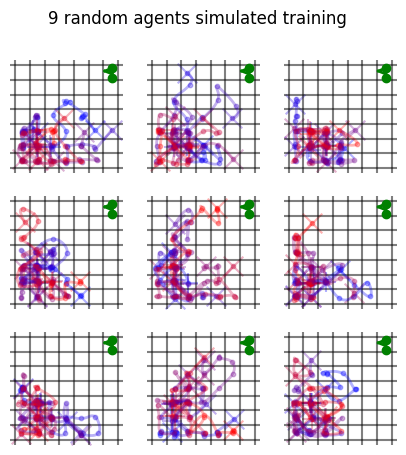

In [3]:
from agents_full_actions import random_agent

NTRIALS = 10
fig,axs = plt.subplots(3,3,sharex=True,sharey=True,figsize= (5,5))
fig.suptitle("9 random agents simulated training")

models_constants = {
    "angle" : {
        "N_actions" : 9
    },
    "distance" : {
        "N_actions" : 4
    },
    "position" : {
        "N_actions" : 9
    }
}

for ax in axs.reshape(-1): 
    # In : an agent based on some hyperparameters : 
    SEED = np.random.randint(1000)

    random_agent_hyperparameters = None
    params_final,training_hist = run_loop(ENVIRONMENT,random_agent(random_agent_hyperparameters,models_constants),SEED,NTRIALS)

    simulated_states = np.array(training_hist["env_states"])

    plot_training(ax,simulated_states,GRID_SIZE,END_COORD,line_width=2,alpha=0.3)


Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
10


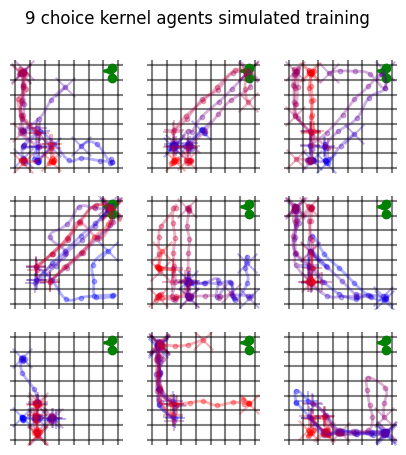

In [4]:
from agents_full_actions import choice_kernel_agent


NTRIALS = 10
fig,axs = plt.subplots(3,3,sharex=True,sharey=True,figsize= (5,5))
fig.suptitle("9 choice kernel agents simulated training")

ck_agent_hyperparameters ={
    "angle":{
        "alpha_ck":0.5,
        "beta_ck" :5.0,
    },
    "position":{
        "alpha_ck":0.5,
        "beta_ck" :5.0,
    },
    "distance":{
        "alpha_ck":0.5,
        "beta_ck" :5.0,
    }
}

for ax in axs.reshape(-1): 
    # In : an agent based on some hyperparameters : 
    SEED = np.random.randint(1000)

    
    # Learning rate x Action selection inverse temperature

    params_final,training_hist = run_loop(ENVIRONMENT,choice_kernel_agent(ck_agent_hyperparameters,models_constants),SEED,NTRIALS)

    simulated_states = np.array(training_hist["env_states"])

    plot_training(ax,simulated_states,GRID_SIZE,END_COORD,line_width=2,alpha=0.3)

print(len(training_hist["actions"]))

In [48]:

GT_ck_agent_hyperparameters ={
    "angle":{
        "alpha_ck":0.5,
        "beta_ck" :5.0,
    },
    "position":{
        "alpha_ck":0.1,
        "beta_ck" :1.0,
    },
    "distance":{
        "alpha_ck":0.05,
        "beta_ck" :6.0,
    }
}


SYNTHETIC_DATA = generate_synthetic_data(ENVIRONMENT,choice_kernel_agent(GT_ck_agent_hyperparameters,models_constants),
                                         n_trials=10,seed = 0,verbose = True)

(formatted_stimuli,bool_stimuli,rewards,true_actions,tmtsp) = SYNTHETIC_DATA

print(true_actions["angle"].shape)
print(true_actions["distance"].shape)
print(true_actions["position"].shape)
# Likelihood of the data :


Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
(10, 10, 9)
(10, 10, 4)
(10, 10, 9)


(100,)
(100,)
(100,)


C:\Users\annic\AppData\Local\Temp\ipykernel_54592\1859344575.py:49: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


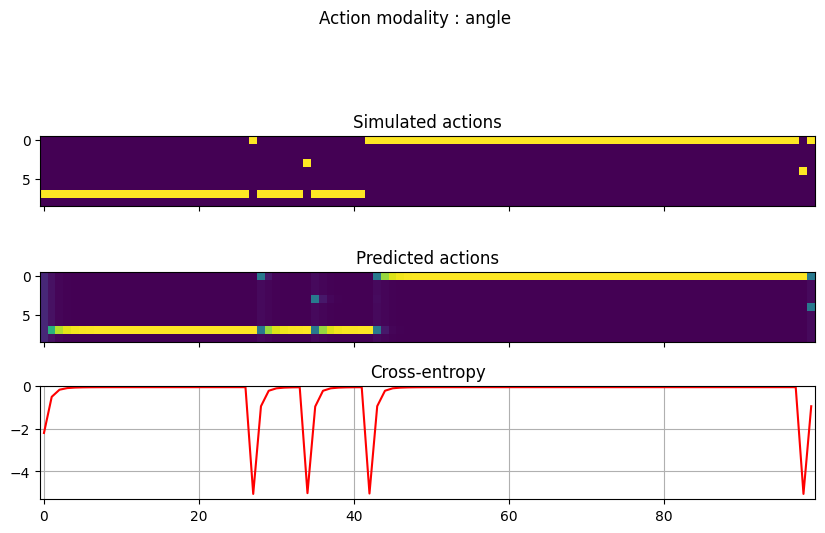

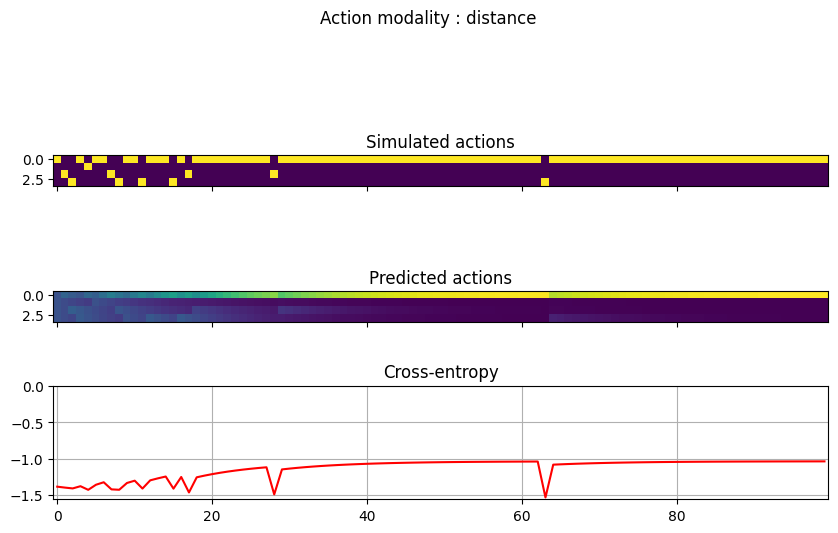

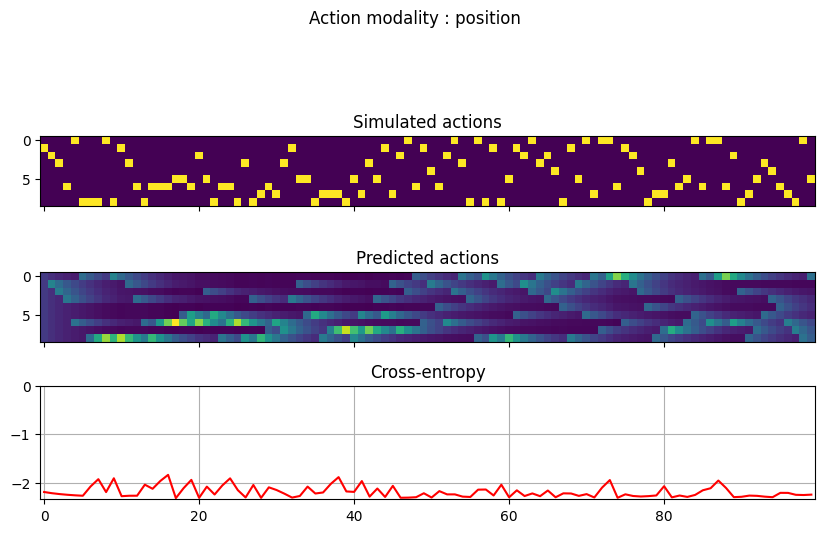

In [49]:

from simulate.compute_likelihood_full_actions import compute_predicted_actions



ck_agent_hyperparameters ={
    "angle":{
        "alpha_ck":0.5,
        "beta_ck" :5.0,
    },
    "position":{
        "alpha_ck":0.2,
        "beta_ck" :1.0,
    },
    "distance":{
        "alpha_ck":0.1,
        "beta_ck" :0.5,
    }
}
final_parameters,predicted_actions,state_history = compute_predicted_actions(SYNTHETIC_DATA,choice_kernel_agent(ck_agent_hyperparameters,models_constants))


# print(predicted_actions)
model_states,other_data = state_history

ck_history,last_action_history = model_states
# print(len(state_history))


# plt.imshow(np.reshape(ck_history["position"],(-1,9)))
for key in predicted_actions.keys():
    fig,axs = plt.subplots(3,1,figsize=(10,5),sharex=True)
    fig.suptitle("Action modality : {}".format(key),y=1.09)
    N_action_cat = true_actions[key].shape[-1]
    
    axs[0].set_title("Simulated actions")
    axs[0].imshow(np.reshape(true_actions[key],(-1,N_action_cat)).T)
    
    axs[1].set_title("Predicted actions")
    axs[1].imshow(np.reshape(predicted_actions[key],(-1,N_action_cat)).T)
    
    
    # Cross entropy : 
    ce = jnp.sum(_jaxlog(predicted_actions[key])*true_actions[key],axis=(-1)).flatten()
    print(ce.shape)
    axs[2].set_title("Cross-entropy")
    axs[2].plot(ce,color='red')
    axs[2].set_ylim(top=0.0)
    axs[2].grid()
    fig.show()


Testing the inversion ! 

{'angle': Array([[-2.19722462e+00, -5.25009371e-02, -4.41493187e-03,
        -1.26686436e-03, -6.78411743e-04, -4.96391498e-04,
        -4.24415513e-04, -3.92692891e-04, -3.77607124e-04,
        -3.70332622e-04],
       [-3.66755034e-04, -3.64966254e-04, -3.64131469e-04,
        -3.63654457e-04, -3.63296713e-04, -3.63296713e-04,
        -3.63296713e-04, -3.63177445e-04, -3.63177445e-04,
        -3.63177445e-04],
       [-3.63177445e-04, -3.63177445e-04, -3.63177445e-04,
        -3.63177445e-04, -3.63177445e-04, -3.63177445e-04,
        -3.63177445e-04, -1.00003633e+01, -7.16456175e-01,
        -1.05536003e-02],
       [-1.66101044e-03, -7.51956773e-04, -5.19112393e-04,
        -4.33479319e-04, -9.92227173e+00, -7.36761689e-01,
        -1.07716825e-02, -1.67886203e-03, -7.55953311e-04,
        -5.20424335e-04],
       [-4.34194866e-04, -3.96866875e-04, -9.96070671e+00,
        -7.06877649e-01, -1.04928827e-02, -1.65886106e-03,
        -7.51598913e-04, -5.19112393e-04, -4.33360052e-04,
 

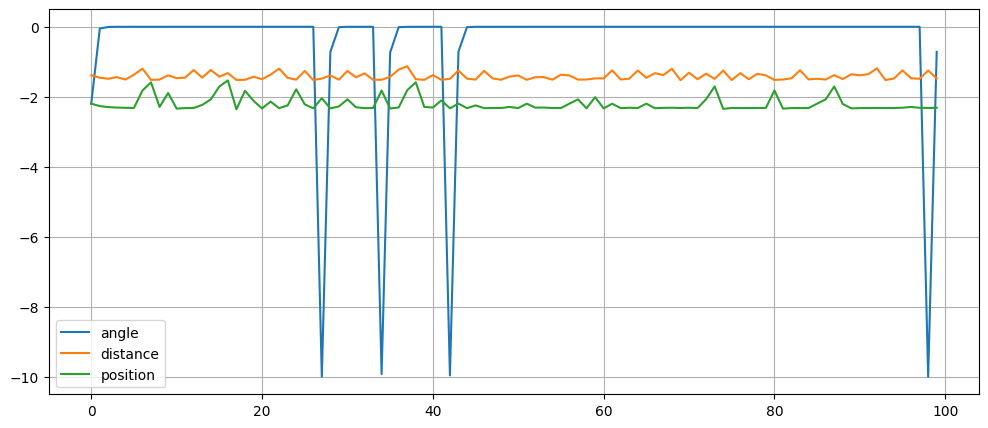

In [46]:
from simulate.compute_likelihood_full_actions import compute_loglikelihood



ck_agent_hyperparameters ={
    "angle":{
        "alpha_ck":0.5,
        "beta_ck" :10.0,
    },
    "position":{
        "alpha_ck":0.5,
        "beta_ck" :1.0,
    },
    "distance":{
        "alpha_ck":0.5,
        "beta_ck" :0.5,
    }
}
lls,ces = compute_loglikelihood(SYNTHETIC_DATA,choice_kernel_agent(ck_agent_hyperparameters,models_constants))

print(ces)
fig,ax = plt.subplots(figsize=(12,5))
for mod,series in ces.items():
    ax.plot(series.flatten(),label=mod)
ax.legend()
ax.grid()


[[[-2.1972246  -0.5089954  -0.15569304 ... -0.03360325 -0.03236274
   -0.0316988 ]
  [-0.03133895 -0.03114253 -0.03103493 ... -0.03091012 -0.03090699
   -0.03090551]
  [-0.03090459 -0.03090404 -0.03090391 ... -5.57174    -0.6424923
   -0.15619692]
  ...
  [-0.03090355 -0.03090355 -0.03090355 ... -0.03090355 -0.03090355
   -0.03090355]
  [-0.03090355 -0.03090355 -0.03090355 ... -0.03090355 -0.03090355
   -0.03090355]
  [-0.03090355 -0.03090355 -0.03090355 ... -0.03090355 -5.57174
   -0.64249223]]

 [[-2.1972246  -0.5090059  -0.15569715 ... -0.03360337 -0.03236287
   -0.03169892]
  [-0.03133919 -0.03114253 -0.03103493 ... -0.03091012 -0.03090724
   -0.03090551]
  [-0.03090472 -0.03090404 -0.03090391 ... -5.571739   -0.64247227
   -0.15619652]
  ...
  [-0.03090355 -0.03090355 -0.03090355 ... -0.03090355 -0.03090355
   -0.03090355]
  [-0.03090355 -0.03090355 -0.03090355 ... -0.03090355 -0.03090355
   -0.03090355]
  [-0.03090355 -0.03090355 -0.03090355 ... -0.03090355 -5.571739
   -0.642472

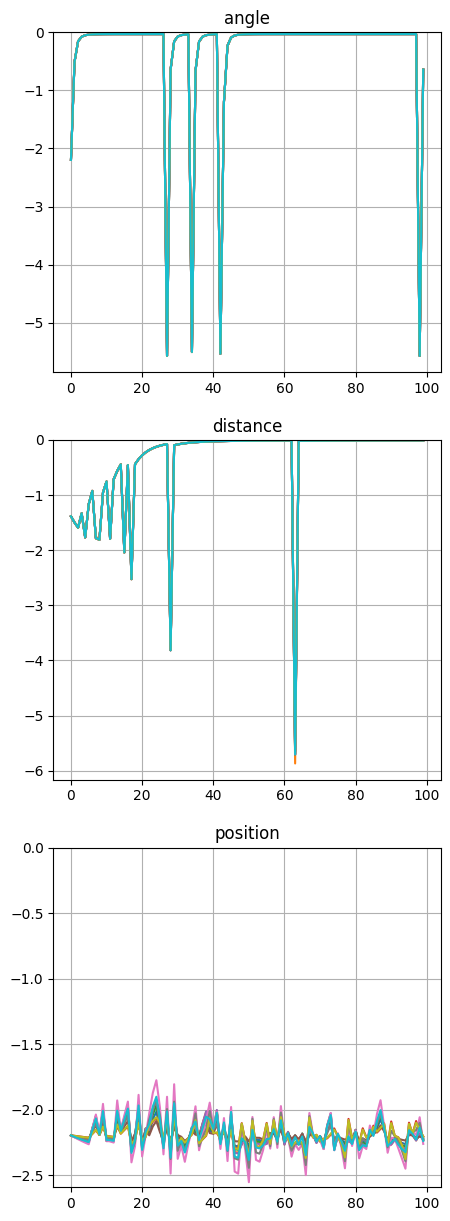

In [50]:
from simulate.compute_likelihood_full_actions import fit_mle_agent
from functools import partial

# Assuming uniform distributions for all parameters :
feature_range_tree ={
    "angle":{
        "alpha_ck":jnp.array([-10,10]),
        "beta_ck" :jnp.array([0,10]),
    },
    "position":{
        "alpha_ck":jnp.array([-10,10]),
        "beta_ck" :jnp.array([0,10]),
    },
    "distance":{
        "alpha_ck":jnp.array([-10,10]),
        "beta_ck" :jnp.array([0,10]),
    }
}
static_agent = partial(choice_kernel_agent,constants= models_constants)

all_fin_params,(gt_mle,all_losses,all_param_histories),encoding_function = fit_mle_agent(SYNTHETIC_DATA,
                            static_agent,feature_range_tree,jax.random.PRNGKey(0),
                            n_heads=100,num_steps=250)

final_lls,cross_entropies = jax.vmap(lambda x : compute_loglikelihood(SYNTHETIC_DATA,static_agent(encoding_function(x)),"sum"))(all_fin_params)

print(cross_entropies["angle"])

fig,axs = plt.subplots(3,1,figsize=(5,15))
for i,key in enumerate(cross_entropies.keys()):
    axs[i].set_title(key)
    for head in range(10):
        axs[i].plot(cross_entropies[key][head].flatten())
    axs[i].set_ylim(ymax=0.0)
    axs[i].grid()
plt.show()

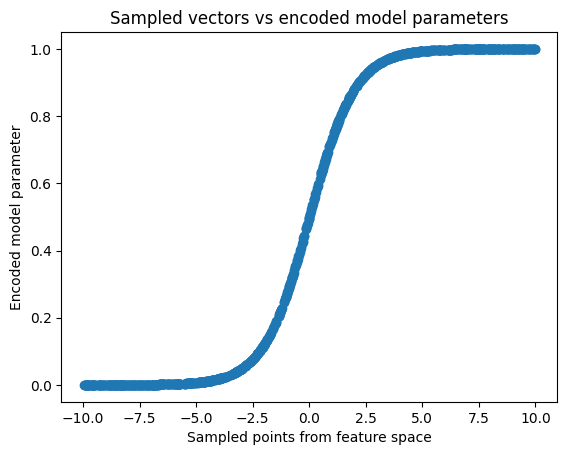

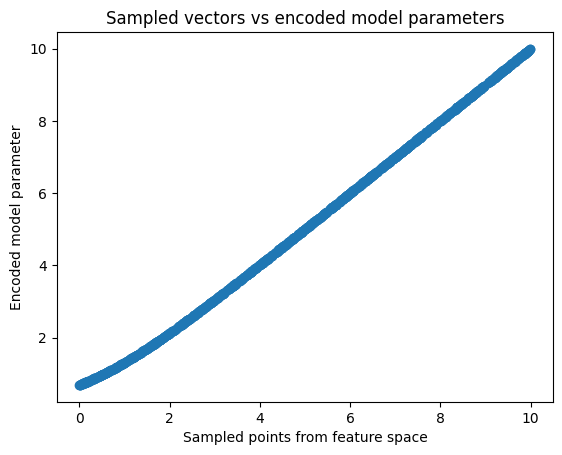

In [51]:
from jax.tree_util import tree_map
import jax.random as jr
from actynf.jaxtynf.jax_toolbox import random_split_like_tree


# Assuming uniform distributions for all parameters :
feature_range_tree ={
    "angle":{
        "alpha_ck":jnp.array([-10,10]),
        "beta_ck" :jnp.array([0,10]),
    },
    "position":{
        "alpha_ck":jnp.array([-10,10]),
        "beta_ck" :jnp.array([0,10]),
    },
    "distance":{
        "alpha_ck":jnp.array([-10,10]),
        "beta_ck" :jnp.array([0,10]),
    }
}

# Running the sampler and encoding into usable model parameters :
n_iter = 1000
rng_key = jr.PRNGKey(0)
rng_key_tree = random_split_like_tree(rng_key,feature_range_tree)
def _uniform_sample_leaf(_rng_leaf,_range_leaf):
    return jr.uniform(_rng_leaf,(n_iter,),minval  = _range_leaf[0], maxval =_range_leaf[1])
sampled_feature_vectors = tree_map(_uniform_sample_leaf,rng_key_tree,feature_range_tree)

_,_,_,_,_,encoding = choice_kernel_agent(None,models_constants)


encoded = jax.vmap(encoding)(sampled_feature_vectors)
plt.title("Sampled vectors vs encoded model parameters")
plt.xlabel("Sampled points from feature space")
plt.ylabel("Encoded model parameter")
plt.scatter(sampled_feature_vectors["angle"]["alpha_ck"],encoded["angle"]["alpha_ck"])
plt.show()
plt.title("Sampled vectors vs encoded model parameters")
plt.xlabel("Sampled points from feature space")
plt.ylabel("Encoded model parameter")
plt.scatter(sampled_feature_vectors["angle"]["beta_ck"],encoded["angle"]["beta_ck"])
plt.show()
